## `Introduction`
>- This is __Majid Sepasi__ <br>
>- My Student ID : **9713114230** <br>
>- I wish us to have a good cooperation together Mr.Fadishei<br>

## `Current Task : `Bitcoin Prediction over a period of 6 months

In [128]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import warnings
from itertools import product
from datetime import datetime
warnings.filterwarnings('ignore')
plt.style.use('seaborn-poster')

## Data Exploration

In [129]:
# Load data
df = pd.read_csv('dataset.csv')
df.head(-4)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4857368,1617148320,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4857369,1617148380,58718.68,58731.23,58698.34,58698.50,0.207983,12209.055282,58702.294657
4857370,1617148440,58736.19,58762.43,58736.19,58739.95,0.041559,2441.376572,58745.145351
4857371,1617148500,58742.18,58742.18,58714.31,58714.31,2.519999,148004.448110,58731.946927


In [130]:
# let's see how many records we have
print(df.shape)

(4857377, 8)


In [131]:
# let's see hom many null values we have for each feature
print(df.isna().sum())

Timestamp                  0
Open                 1243608
High                 1243608
Low                  1243608
Close                1243608
Volume_(BTC)         1243608
Volume_(Currency)    1243608
Weighted_Price       1243608
dtype: int64


In [132]:
# and if we want to see the information of null values as percent
print(df.isna().sum() / df.shape[0] * 100)

Timestamp             0.00000
Open                 25.60246
High                 25.60246
Low                  25.60246
Close                25.60246
Volume_(BTC)         25.60246
Volume_(Currency)    25.60246
Weighted_Price       25.60246
dtype: float64


#### we can see that 25% of all records are all null

In [133]:
df.Timestamp

0          1325317920
1          1325317980
2          1325318040
3          1325318100
4          1325318160
              ...    
4857372    1617148560
4857373    1617148620
4857374    1617148680
4857375    1617148740
4857376    1617148800
Name: Timestamp, Length: 4857377, dtype: int64

### `notes` : <br>
>- As we can see, timestamp type is based on unix time
>- unix time : number of seconds that have passed since 00:00:00 UTC Thursday, 1 January 1970
>- because in this project , we need time based on days , months and years, we have to change it into those types

In [134]:
# Unix-time to 
df.Timestamp = pd.to_datetime(df.Timestamp, unit='s')

In [135]:
df.head(3)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,2011-12-31 07:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-12-31 07:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### now our timestamp format has been changed

In [136]:
## we change dataframe index to timestamp
df.index = df.Timestamp
df.head(3)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,,
2011-12-31 07:52:00,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2011-12-31 07:53:00,2011-12-31 07:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 07:54:00,2011-12-31 07:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [137]:
# Resampling to daily frequency
df_day = df.resample('D').mean()
df_day.head(5)

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603
2012-01-01,4.806667,4.806667,4.806667,4.806667,7.200667,35.259720,4.806667
2012-01-02,5.000000,5.000000,5.000000,5.000000,19.048000,95.240000,5.000000
2012-01-03,5.252500,5.252500,5.252500,5.252500,11.004660,58.100651,5.252500
2012-01-04,5.200000,5.223333,5.200000,5.223333,11.914807,63.119577,5.208159


In [138]:
# Resampling to monthly frequency
df_month = df_day.resample('M').mean()
df_month.head(5)

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603
2012-01-31,6.208043,6.210657,6.205760,6.208932,5.411459,32.615170,6.208550
2012-02-29,5.253117,5.255079,5.250537,5.252514,8.398000,43.115105,5.252527
2012-03-31,4.963496,4.964408,4.960139,4.961054,15.830074,78.996873,4.962021
2012-04-30,4.976732,4.978059,4.975054,4.976416,19.889152,98.856816,4.976547


In [139]:
# Resampling to annual frequency
df_year = df_day.resample('A-DEC').mean()
df_year.head(5)

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603
2012-12-31,8.231974,8.234157,8.229290,8.231481,18.475207,157.887208,8.231637
2013-12-31,187.504133,187.756865,187.219807,187.493509,15.585383,3375.286140,187.478951
2014-12-31,525.455487,525.866411,525.031252,525.460748,11.681561,6058.110049,525.436669
2015-12-31,272.237769,272.370361,272.090766,272.235549,14.233247,3937.145717,272.225658


In [140]:
# Resampling to quarterly frequency
df_Q = df_day.resample('Q-DEC').mean()
df_Q.head(5)

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603
2012-03-31,5.479759,5.481586,5.477016,5.479038,9.912412,51.761664,5.479242
2012-06-30,5.326608,5.327696,5.325338,5.326423,22.896866,124.651325,5.326512
2012-09-30,10.026331,10.030034,10.022312,10.025868,19.110227,188.212566,10.026230
2012-12-31,12.033701,12.035802,12.031014,12.033101,21.936309,265.408481,12.033069


In [141]:
print("Daily shape : ", df_day.shape)
print("Monthly shape : ", df_month.shape)
print("Annual shape : ", df_year.shape)
print("Quarterly shape : ", df_Q.shape)

Daily shape :  (3379, 7)
Monthly shape :  (112, 7)
Annual shape :  (11, 7)
Quarterly shape :  (38, 7)


In [142]:
#check different timestamps have any missing value or not
print("Daily Timestamp missing values = ", df_day.isna().sum().sum())
print("Montyly Timestamp missing values = ", df_month.isna().sum().sum())
print("Annual Timestamp missing values = ", df_year.isna().sum().sum())
print("Quarterly Timestamp missing values = ", df_Q.isna().sum().sum())

Daily Timestamp missing values =  21
Montyly Timestamp missing values =  0
Annual Timestamp missing values =  0
Quarterly Timestamp missing values =  0


In [143]:
pr = df_year.loc['2021-12-31']['Close'] / df_year.loc['2011-12-31']['Close'] * 100
print(f'If We would buy BTC in 2011 and sell it in 2021 we could take profit : {round(pr, 2)}%')

If We would buy BTC in 2011 and sell it in 2021 we could take profit : 1005193.82%


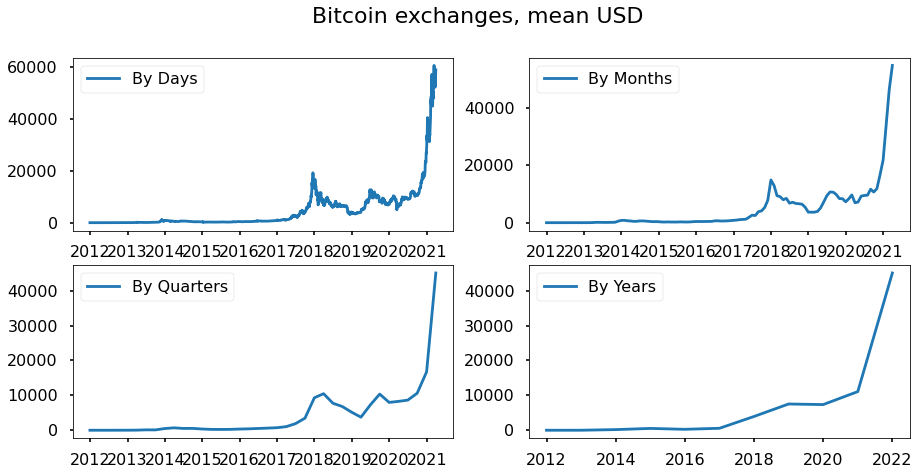

In [144]:
# PLOTS
fig = plt.figure(figsize=[15, 7])
plt.suptitle('Bitcoin exchanges, mean USD', fontsize=22)

plt.subplot(221)
plt.plot(df_day.Weighted_Price, '-', label='By Days')
plt.legend()

plt.subplot(222)
plt.plot(df_month.Weighted_Price, '-', label='By Months')
plt.legend()

plt.subplot(223)
plt.plot(df_Q.Weighted_Price, '-', label='By Quarters')
plt.legend()

plt.subplot(224)
plt.plot(df_year.Weighted_Price, '-', label='By Years')
plt.legend()

# plt.tight_layout()
plt.show()

> I'm  gonna predict bitcoin prices by months.
> 

## Stationarity check and STL-decomposition of the series

> `statsmodels library : `
As its name implies, statsmodels is a Python library built specifically
for statistics. Statsmodels is built on top of NumPy, SciPy, and matplotlib, but it containsmore advanced functions
for statistical testing and modeling that you won't find in numerical libraries like NumPy or SciPy

In [159]:
import statsmodels.api as sm

Dickey–Fuller test: p=0.998863


<Figure size 1080x504 with 0 Axes>

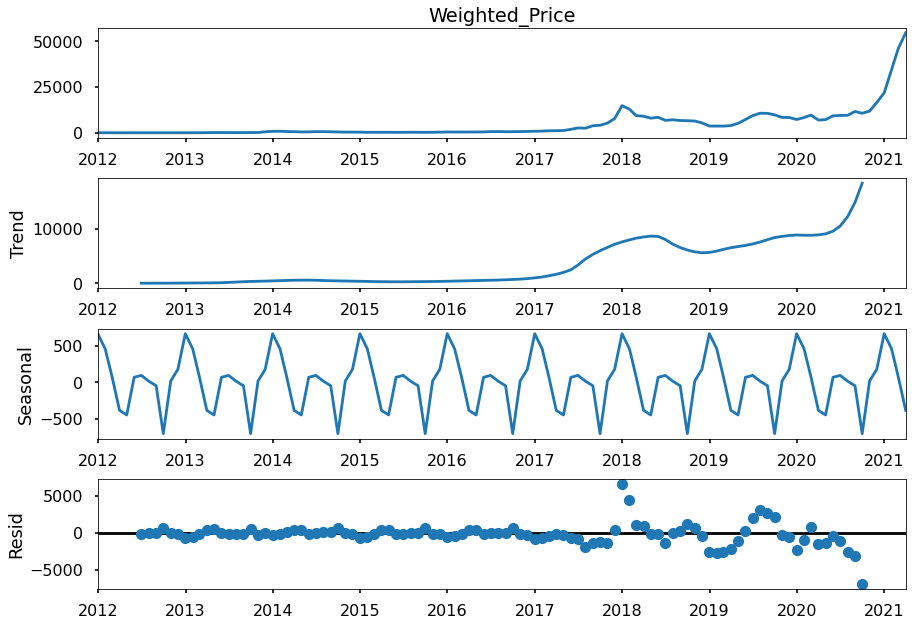

In [146]:
plt.figure(figsize=[15,7])
sm.tsa.seasonal_decompose(df_month.Weighted_Price).plot()
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.Weighted_Price)[1])
plt.show()

> The series are not stationary.

In [147]:
# Box-Cox Transformations
df_month['Weighted_Price_box'], lmbda = stats.boxcox(df_month.Weighted_Price)
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.Weighted_Price)[1])

Dickey–Fuller test: p=0.998863


> A Box Cox transformation is a transformation of non-normal dependent variables into a normal shape. Normality is an important assumption for many statistical techniques; if your data isn’t normal, applying a Box-Cox means that you are able to run a broader number of tests

> The series are not stationary.

## Seasonal differentiation

In [148]:
# Seasonal differentiation
df_month['prices_box_diff'] = df_month.Weighted_Price_box - df_month.Weighted_Price_box.shift(12)
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.prices_box_diff[12:])[1])

Dickey–Fuller test: p=0.444282


> The series are not stationary.

Dickey–Fuller test: p=0.000024


<Figure size 1080x504 with 0 Axes>

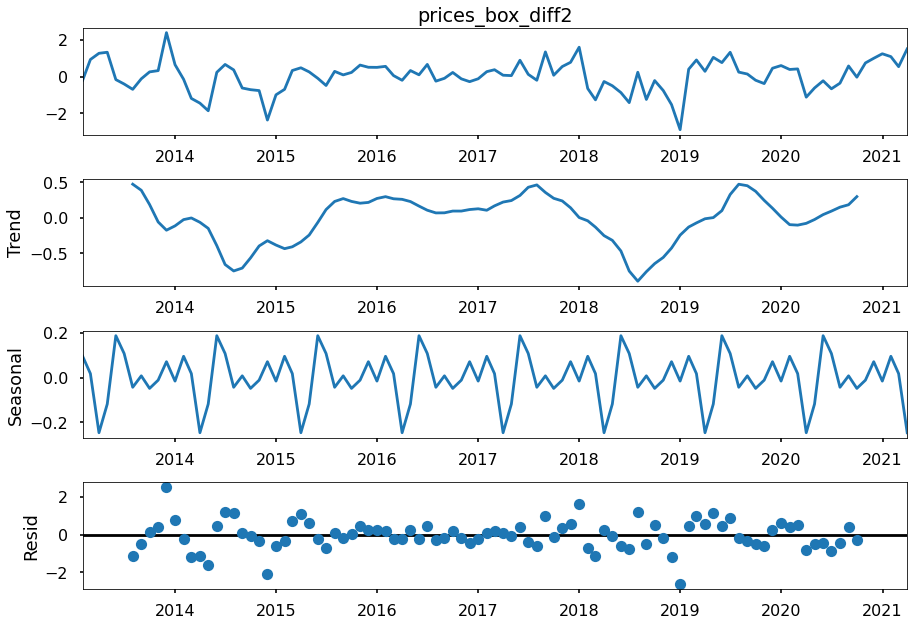

In [158]:
# Regular differentiation
df_month['prices_box_diff2'] = df_month.prices_box_diff - df_month.prices_box_diff.shift(1)
plt.figure(figsize=(15,7))

# STL-decomposition
sm.tsa.seasonal_decompose(df_month.prices_box_diff2[13:]).plot()   
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.prices_box_diff2[13:])[1])

plt.show()

> The series are stationary.

## Model Selection

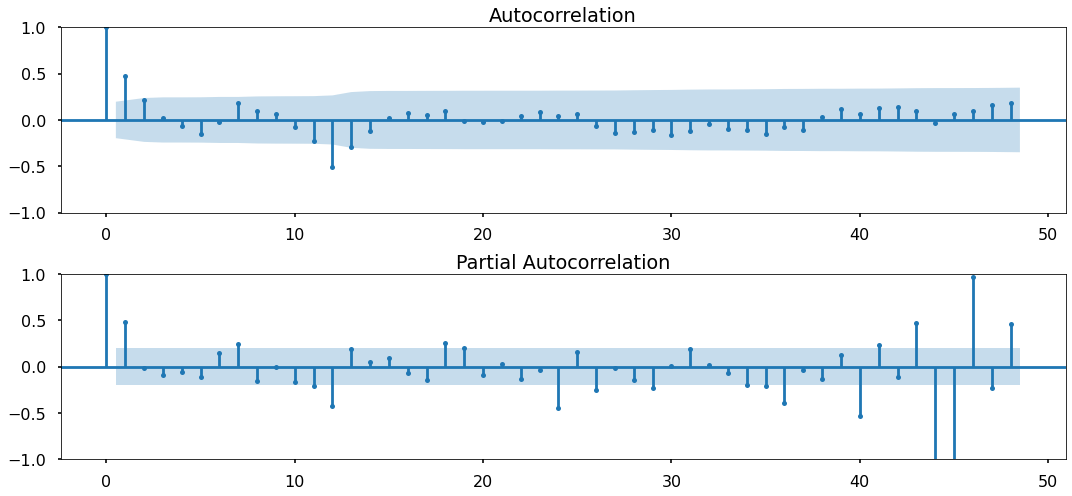

In [150]:
# Initial approximation of parameters using Autocorrelation and Partial Autocorrelation Plots
plt.figure(figsize=(15,7))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(df_month.prices_box_diff2[13:].values.squeeze(), lags=48, ax=ax)
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(df_month.prices_box_diff2[13:].values.squeeze(), lags=48, ax=ax)
plt.tight_layout()
plt.show()

In [151]:
# Initial approximation of parameters
Qs = range(0, 2)
qs = range(0, 3)
Ps = range(0, 3)
ps = range(0, 3)
D=1
d=1
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model=sm.tsa.statespace.SARIMAX(df_month.Weighted_Price_box, order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

In [152]:
# Best Models
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())
print(best_model.summary())

      parameters         aic
19  (1, 0, 0, 1)  173.616671
21  (1, 0, 1, 1)  174.766384
25  (1, 1, 0, 1)  175.547536
37  (2, 0, 0, 1)  175.554192
7   (0, 1, 0, 1)  175.588949
                                      SARIMAX Results                                       
Dep. Variable:                   Weighted_Price_box   No. Observations:                  112
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood                 -83.808
Date:                              Mon, 20 Jun 2022   AIC                            173.617
Time:                                      20:59:39   BIC                            181.402
Sample:                                  12-31-2011   HQIC                           176.767
                                       - 03-31-2021                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---

## Analysis of residues

Dickey–Fuller test:: p=0.000000


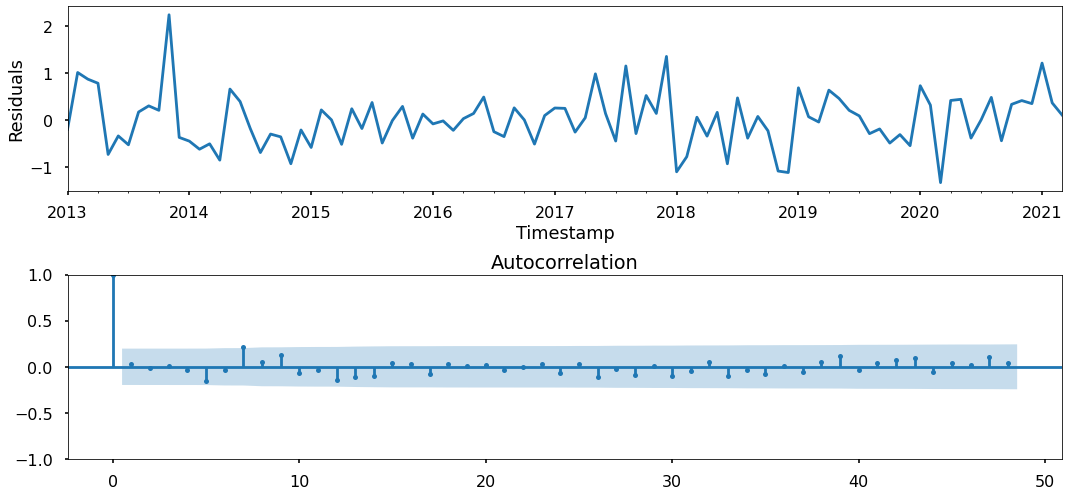

In [153]:
# STL-decomposition
plt.figure(figsize=(15,7))
plt.subplot(211)
best_model.resid[13:].plot()
plt.ylabel(u'Residuals')
ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid[13:].values.squeeze(), lags=48, ax=ax)

print("Dickey–Fuller test:: p=%f" % sm.tsa.stattools.adfuller(best_model.resid[13:])[1])

plt.tight_layout()
plt.show()

## Prediction

In [154]:
# Inverse Box-Cox Transformation Function
def invboxcox(y,lmbda):
   if lmbda == 0:
      return(np.exp(y))
   else:
      return(np.exp(np.log(lmbda*y+1)/lmbda))

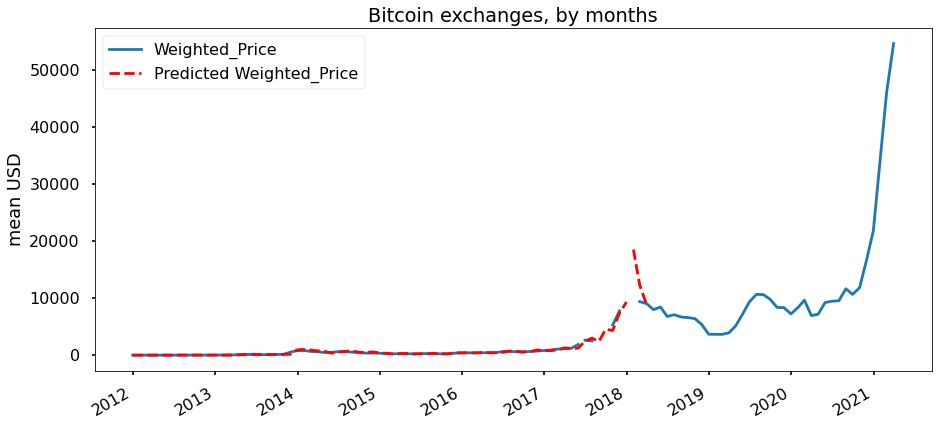

In [155]:
# Prediction
df_month2 = df_month[['Weighted_Price']]
date_list = [datetime(2017, 6, 30), datetime(2017, 7, 31), datetime(2017, 8, 31), datetime(2017, 9, 30), 
             datetime(2017, 10, 31), datetime(2017, 11, 30), datetime(2017, 12, 31), datetime(2018, 1, 31),
             datetime(2018, 1, 28)]
future = pd.DataFrame(index=date_list, columns= df_month.columns)
df_month2 = pd.concat([df_month2, future])
df_month2['forecast'] = invboxcox(best_model.predict(start=0, end=75), lmbda)
plt.figure(figsize=(15,7))
df_month2.Weighted_Price.plot()
df_month2.forecast.plot(color='r', ls='--', label='Predicted Weighted_Price')
plt.legend()
plt.title('Bitcoin exchanges, by months')
plt.ylabel('mean USD')
plt.show()